In [2]:
pip install tensorflow numpy pandas matplotlib scikit-learn opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = r'D:\Perkuliahan\Semester 6\Certan\Proyek\dataset_kotoran_ayam'
categories = ['Healthy', 'Coccidiosis', 'Salmonella','NewCastleDisease']

img_size = 128

def load_data():
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (img_size, img_size))
                data.append(resized_array)
                labels.append(class_num)
            except Exception as e:
                pass
    return np.array(data), np.array(labels)

X, y = load_data()

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\Niko Simanjuntak\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)


Epoch 1/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 29s 178ms/step - accuracy: 0.5130 - loss: 1.0917 - val_accuracy: 0.7847 - val_loss: 0.5987
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 37s 246ms/step - accuracy: 0.7852 - loss: 0.6287 - val_accuracy: 0.7881 - val_loss: 0.5804
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 26s 175ms/step - accuracy: 0.8212 - loss: 0.5232 - val_accuracy: 0.8478 - val_loss: 0.4482
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 30s 201ms/step - accuracy: 0.8380 - loss: 0.4790 - val_accuracy: 0.8469 - val_loss: 0.4262
Epoch 5/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 29s 193ms/step - accuracy: 0.8414 - loss: 0.4326 - val_accuracy: 0.8747 - val_loss: 0.3629
Epoch 6/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 42s 284ms/step - accuracy: 0.8664 - loss: 0.3682 - val_accuracy: 0.8234 - val_loss: 0.4557
Epoch 7/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 81s 541ms/step - accuracy: 0.8748 - loss: 0.3559 - val_accuracy: 0.8780 - val_loss: 0.3519
Epoch 8/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 553ms/step - accuracy: 0.9092 - loss: 0

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.8904 - loss: 0.4639

Test accuracy: 0.8930013179779053


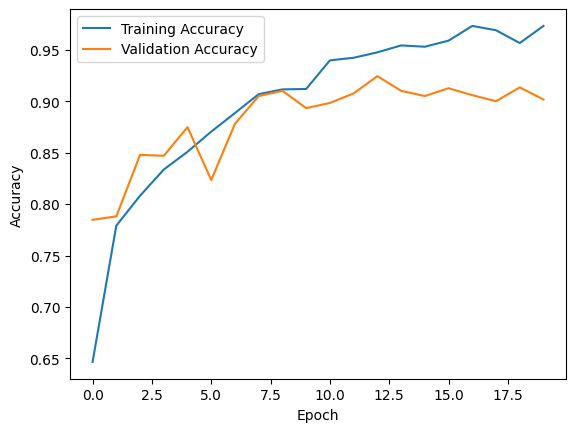

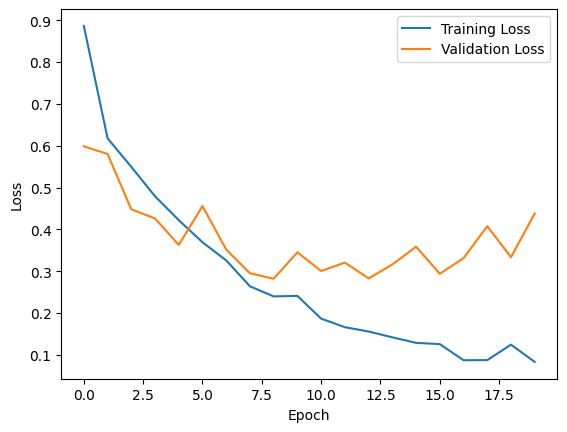

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

cr = classification_report(y_test, y_pred, target_names=categories)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Akurasi Model: {accuracy:.2f}%")


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step
Confusion Matrix:
 [[452  14  21   3]
 [  8 451   4   0]
 [ 29  15 373   4]
 [ 36  15  10  51]]
Akurasi Model: 89.30%


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model.predict(X_test), axis=1)

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Akurasi Model: {accuracy:.2f}%")


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
Akurasi Model: 89.30%


In [17]:
model.save("model.keras")
